In [1]:
from pathlib import Path

base_path = Path.cwd().parent
base_path

PosixPath('/Users/frankfan/Learn/Imperial/final-year-project/software_archive')

In [2]:
crohns_data_path = base_path / 'processed_crohns'

In [3]:
crohns_image_prefix = 'Crohns2023'

for modality in ('Axial', 'Coronal'):
    crohns_image_folder = crohns_image_prefix + modality
    crohns_image_path = crohns_data_path / crohns_image_folder
    crohns_centerline_folder = crohns_image_prefix + modality + 'Centerlines'
    crohns_centerline_path = crohns_data_path / crohns_centerline_folder
    crohns_label_folder = crohns_image_prefix + modality + 'Labels'
    crohns_label_path = crohns_data_path / crohns_label_folder
    print(f"Modality {modality}: {len(list(crohns_image_path.glob('*.nii.gz')))} images")
    print(f"Modality {modality}: {len(list(crohns_centerline_path.glob('*.xml')))} centerlines\n")
    print(f"Modality {modality}: {len(list(crohns_label_path.glob('*.nii.gz')))} labels")
    print(f"Modality {modality}: {len(list(crohns_image_path.glob('A*.nii.gz')))} abnormal images")
    print(f"Modality {modality}: {len(list(crohns_image_path.glob('I*.nii.gz')))} normal images\n")
    print(f"Modality {modality}: {len(list(crohns_centerline_path.glob('A*.xml')))} abnormal centerlines")
    print(f"Modality {modality}: {len(list(crohns_centerline_path.glob('I*.xml')))} normal centerlines\n")
    print(f"Modality {modality}: {len(list(crohns_label_path.glob('A*.nii.gz')))} abnormal manual segmentations")
    print(f"Modality {modality}: {len(list(crohns_label_path.glob('I*.nii.gz')))} normal manual segmentations\n")



Modality Axial: 233 images
Modality Axial: 103 centerlines

Modality Axial: 38 labels
Modality Axial: 113 abnormal images
Modality Axial: 120 normal images

Modality Axial: 59 abnormal centerlines
Modality Axial: 44 normal centerlines

Modality Axial: 18 abnormal manual segmentations
Modality Axial: 20 normal manual segmentations

Modality Coronal: 233 images
Modality Coronal: 93 centerlines

Modality Coronal: 48 labels
Modality Coronal: 113 abnormal images
Modality Coronal: 120 normal images

Modality Coronal: 46 abnormal centerlines
Modality Coronal: 47 normal centerlines

Modality Coronal: 18 abnormal manual segmentations
Modality Coronal: 30 normal manual segmentations



In [4]:
# explore the post contrast images
crohns_axial_postcon_labels_folder = crohns_data_path.parent / "structured_crohns" / "labels_binary" / "axial" / "postcon"
print(f"Modality Axial Postcon: {len(list(crohns_axial_postcon_labels_folder.glob('A*.nii.gz')))} abnormal manual segmentations")
print(f"Modality Axial Postcon: {len(list(crohns_axial_postcon_labels_folder.glob('I*.nii.gz')))} normal manual segmentations\n")

Modality Axial Postcon: 13 abnormal manual segmentations
Modality Axial Postcon: 20 normal manual segmentations



In [5]:
crohns_axial_images_folder = crohns_data_path / 'Crohns2023Axial'
crohns_axial_centerlines_folder = crohns_data_path / 'Crohns2023AxialCenterlines'
crohns_axial_labels_folder = crohns_data_path / 'Crohns2023AxialLabels'

In [6]:
crohns_axial_images_paths = sorted(list(crohns_axial_images_folder.glob('*.nii.gz')))
crohns_axial_centerlines_paths = sorted(list(crohns_axial_centerlines_folder.glob('*.xml')))
crohns_axial_labels_paths = sorted(list(crohns_axial_labels_folder.glob('*.nii.gz')))

In [7]:
crohns_coronal_images_folder = crohns_data_path / 'Crohns2023Coronal'
crohns_coronal_centerlines_folder = crohns_data_path / 'Crohns2023CoronalCenterlines'
crohns_coronal_labels_folder = crohns_data_path / 'Crohns2023CoronalLabels'
crohns_coronal_images_paths = sorted(list(crohns_coronal_images_folder.glob('*.nii.gz')))
crohns_coronal_centerlines_paths = sorted(list(crohns_coronal_centerlines_folder.glob('*.xml')))
crohns_coronal_labels_paths = sorted(list(crohns_coronal_labels_folder.glob('*.nii.gz')))

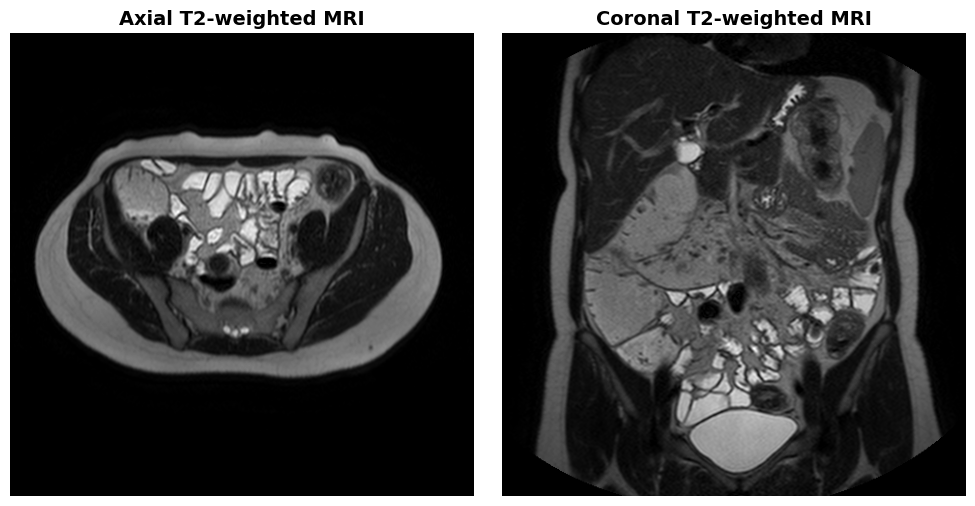

In [8]:
from matplotlib import pyplot as plt
import numpy as np
import SimpleITK as sitk

index = 223

crohns_axial_image_path = crohns_axial_images_paths[index]
crohns_coronal_image_path = crohns_coronal_images_paths[index]
# read image
crohns_axial_image = sitk.ReadImage(str(crohns_axial_image_path))
crohns_axial_image = sitk.GetArrayFromImage(crohns_axial_image)

crohns_coronal_image = sitk.ReadImage(str(crohns_coronal_image_path))
crohns_coronal_image = sitk.GetArrayFromImage(crohns_coronal_image)

# display images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(crohns_axial_image[12, :, :], cmap='gray')
ax1.set_title('Axial T2-weighted MRI', fontsize=14, fontweight='bold')
ax2.imshow(crohns_coronal_image[12, :, :], cmap='gray')
ax2.set_title('Coronal T2-weighted MRI', fontsize=14, fontweight='bold')
ax1.axis('off')
ax2.axis('off')
plt.tight_layout()
plt.show()

Image: I111_axial.nii.gz
Image shape: (72, 480, 480)
Label shape: (72, 480, 480)


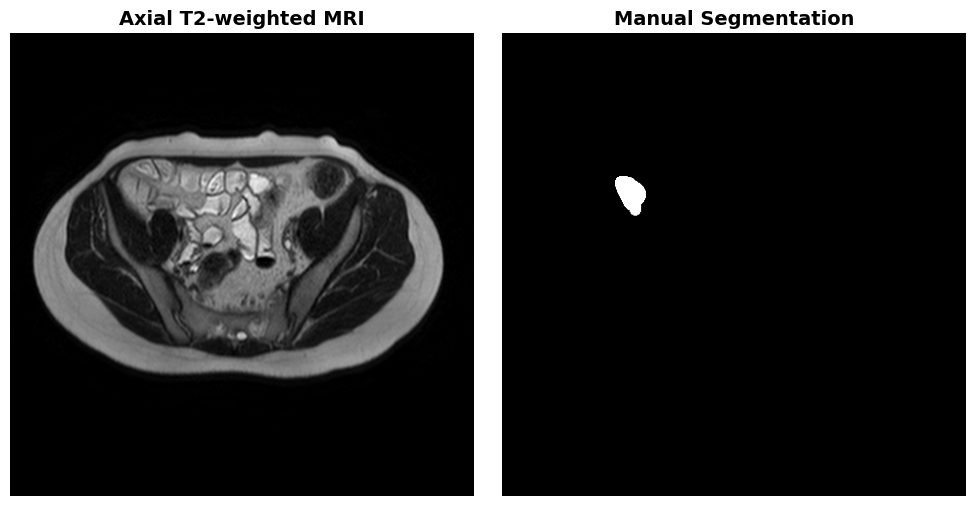

In [9]:
# draw index from labels
np.random.seed(42)
index = np.random.randint(0, len(crohns_axial_labels_paths))
crohns_axial_label_path = crohns_axial_labels_paths[index]
crohns_axial_label = sitk.ReadImage(str(crohns_axial_label_path))
crohns_axial_label = sitk.GetArrayFromImage(crohns_axial_label)

crohns_axial_image_name = crohns_axial_label_path.name
crohns_axial_image_path = crohns_axial_images_folder / crohns_axial_image_name
crohns_axial_image = sitk.ReadImage(str(crohns_axial_image_path))
crohns_axial_image = sitk.GetArrayFromImage(crohns_axial_image)
print(f"Image: {crohns_axial_image_name}")
print(f"Image shape: {crohns_axial_image.shape}")
print(f"Label shape: {crohns_axial_label.shape}")

# show image and label
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(crohns_axial_image[10, :, :], cmap='gray')
ax1.set_title('Axial T2-weighted MRI', fontsize=14, fontweight='bold')
ax2.imshow(crohns_axial_label[10, :, :], cmap='gray')
ax2.set_title('Manual Segmentation', fontsize=14, fontweight='bold')
ax1.axis('off')
ax2.axis('off')
plt.tight_layout()
plt.show()

Image: I111_coronal.nii.gz
Image shape: (34, 480, 480)
Label shape: (34, 480, 480)


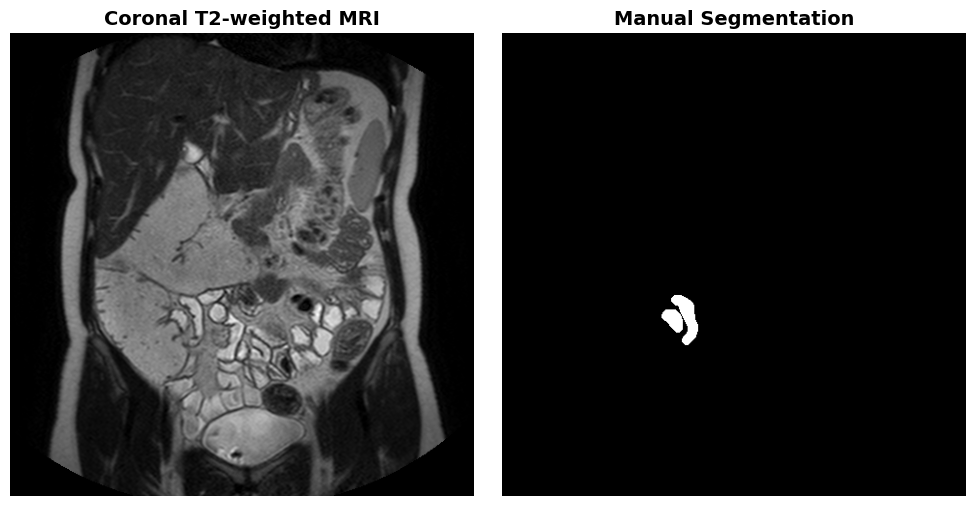

In [10]:
# repeat for coronal
np.random.seed(42)
index = np.random.randint(0, len(crohns_coronal_labels_paths))
crohns_coronal_label_path = crohns_coronal_labels_paths[index]
crohns_coronal_label = sitk.ReadImage(str(crohns_coronal_label_path))
crohns_coronal_label = sitk.GetArrayFromImage(crohns_coronal_label)


crohns_coronal_image_name = crohns_coronal_label_path.name
crohns_coronal_image_path = crohns_coronal_images_folder / crohns_coronal_image_name
crohns_coronal_image = sitk.ReadImage(str(crohns_coronal_image_path))
crohns_coronal_image = sitk.GetArrayFromImage(crohns_coronal_image)

print(f"Image: {crohns_coronal_image_name}")
print(f"Image shape: {crohns_coronal_image.shape}")
print(f"Label shape: {crohns_coronal_label.shape}")

# show image and label
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(crohns_coronal_image[10, :, :], cmap='gray')
ax1.set_title('Coronal T2-weighted MRI', fontsize=14, fontweight='bold')
ax2.imshow(crohns_coronal_label[10, :, :], cmap='gray')
ax2.set_title('Manual Segmentation', fontsize=14, fontweight='bold')
ax1.axis('off')
ax2.axis('off')
plt.tight_layout()
plt.show()

### Centerlines

In [11]:
import xml.etree.ElementTree as ET

# read centerline
np.random.seed(42)
index = np.random.randint(0, len(crohns_axial_centerlines_paths))
crohns_axial_centerline_path = crohns_axial_centerlines_paths[index]
identifier = crohns_axial_centerline_path.name.split('.')[0]
print(f"Centerline: {crohns_axial_centerline_path.name}")
# find corresponding image
crohns_axial_image_path = crohns_axial_images_folder / f"{identifier}.nii.gz"
crohns_axial_image = sitk.ReadImage(str(crohns_axial_image_path))
crohns_axial_centerline = ET.parse(str(crohns_axial_centerline_path))
root = crohns_axial_centerline.getroot()

Centerline: I100_axial.xml


In [12]:
# get centerline points
crohns_axial_centerline_points = []
for path in root:
    if 'name' not in path.attrib:
        continue

    for point in path:
        x = int(point.attrib['x'])
        y = int(point.attrib['y'])
        z = int(point.attrib['z'])
        crohns_axial_centerline_points.append((x, y, z))
    
size = int(len(crohns_axial_centerline_points) * 0.2)
crohns_axial_centerline_points = np.array(crohns_axial_centerline_points)[:size]

In [13]:
xmin = int(np.min(crohns_axial_centerline_points[:, 0]))
xmax = int(np.max(crohns_axial_centerline_points[:, 0]))

ymin = int(np.min(crohns_axial_centerline_points[:, 1]))
ymax = int(np.max(crohns_axial_centerline_points[:, 1]))

zmin = int(np.min(crohns_axial_centerline_points[:, 2]))
zmax = int(np.max(crohns_axial_centerline_points[:, 2]))

corner = (xmin, ymin, zmin)
size = (xmax - xmin + 1, ymax - ymin + 1, zmax - zmin + 1)

print(f"Corner: {corner}")
print(f"Size: {size}")

Corner: (164, 227, 9)
Size: (65, 76, 17)


In [14]:
import SimpleITK as sitk
cropped_image = sitk.RegionOfInterest(crohns_axial_image, size, corner)

In [15]:
crohns_axial_image_arr = sitk.GetArrayFromImage(crohns_axial_image)
cropped_image_arr = sitk.GetArrayFromImage(cropped_image)

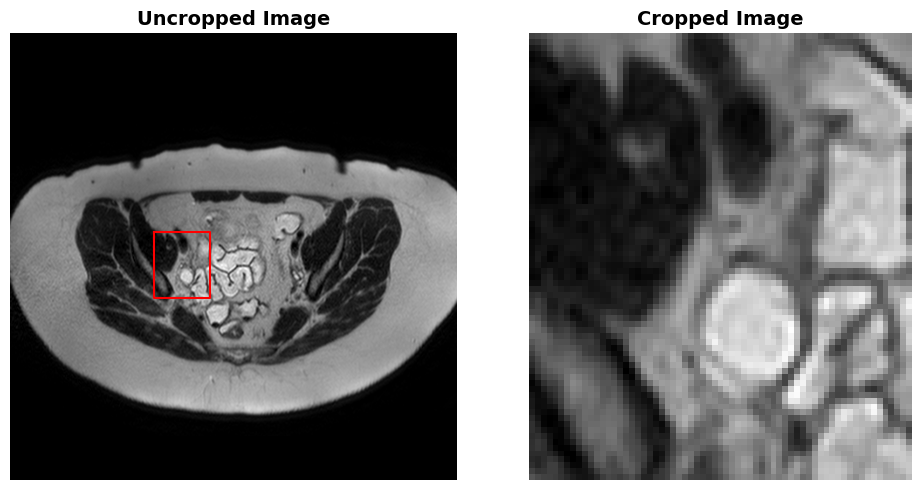

In [16]:
# show uncropped and cropped image
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(crohns_axial_image_arr[9, :, :], cmap='gray')
ax1.set_title('Uncropped Image', fontsize=14, fontweight='bold')
# bounding box from corner and size
xmin, ymin, _ = corner
width, height, _ = size
xmax = xmin + width
ymax = ymin + height
ax1.plot([xmin, xmax, xmax, xmin, xmin], [ymin, ymin, ymax, ymax, ymin], 'r')
ax2.imshow(cropped_image_arr[1, :, :], cmap='gray')
ax2.set_title('Cropped Image', fontsize=14, fontweight='bold')
ax1.axis('off')
ax2.axis('off')
plt.tight_layout()
plt.show()

In [17]:
points_in_cropped_image = crohns_axial_centerline_points - np.array(corner)

In [18]:
# Create the filter of CastImageFilter
myFilterCastImage = sitk.CastImageFilter()

# Set output pixel type (float32)
myFilterCastImage.SetOutputPixelType(sitk.sitkFloat32)
cropped_img_float32 = myFilterCastImage.Execute(cropped_image)

# Apply N4 bias field correction to the image
n4_correction = sitk.N4BiasFieldCorrectionImageFilter()
n4_correction.SetConvergenceThreshold(1e-3)
n4_correction.SetMaximumNumberOfIterations((10, 10, 10, 10))
n4_correction.SetBiasFieldFullWidthAtHalfMaximum(0.1)
n4_correction.SetWienerFilterNoise(0.01)
n4_correction.SetNumberOfHistogramBins(100)
n4_correction.SetNumberOfControlPoints((4, 4, 4))
n4_correction.SetSplineOrder(3)
corrected_img = n4_correction.Execute(cropped_img_float32)

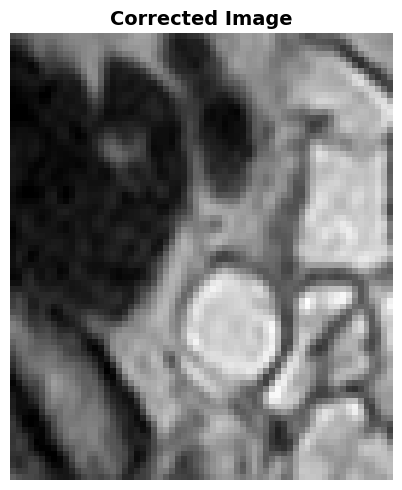

In [19]:
# show corrected image
corrected_img_arr = sitk.GetArrayFromImage(corrected_img)
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.imshow(corrected_img_arr[1, :, :], cmap='gray')
ax.set_title('Corrected Image', fontsize=14, fontweight='bold')
ax.axis('off')
plt.tight_layout()
plt.show()

In [20]:
# Denoising using curvature driven flow
cflow = sitk.CurvatureFlowImageFilter()
cflow.SetTimeStep(0.05)
cflow.SetNumberOfIterations(100)
denoised_img = cflow.Execute(corrected_img)

# Laplacian sharpening
lp_sharp = sitk.LaplacianSharpeningImageFilter()
sharpened_edges_image = lp_sharp.Execute(denoised_img)

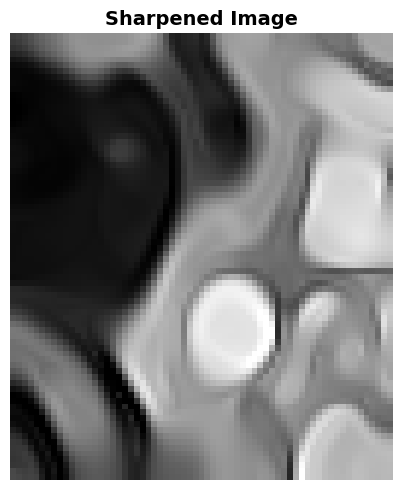

In [21]:
# show sharpened image
sharpened_edges_image_arr = sitk.GetArrayFromImage(sharpened_edges_image)
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.imshow(sharpened_edges_image_arr[1, :, :], cmap='gray')
ax.set_title('Sharpened Image', fontsize=14, fontweight='bold')
ax.axis('off')
plt.tight_layout()
plt.show()

In [22]:
# SLIC
slic = sitk.SLICImageFilter()
slic.SetMaximumNumberOfIterations(50)
slic.SetSuperGridSize((6, 6, 6))
slic.SetSpatialProximityWeight(5.0)
slic.SetEnforceConnectivity(True)
slic.SetInitializationPerturbation(True)
cropped_seg = slic.Execute(sharpened_edges_image)

In [23]:
def get_slic_segments_using_coordinates(seg: sitk.Image, points: list):
    """
    Using a SLIC-segmented image and centreline co-ordinates, select the superpixel clusters which
    lie on the centreline. 
    
    :param seg: SLIC-segmented SimpleITK image
    :param points: list of centreline co-ordinates
    :return: selected superpixel clusters, as a SimpleITK image
    """
    def apply_intensity_mask(arr, intensity_mask):
        arr[intensity_mask] = 0

    def generate_intensity_mask(arr, required_intensities):
        return ~np.isin(arr, required_intensities)

    required_intensities = []
    arr = sitk.GetArrayFromImage(seg)

    for point in points:
        x, y, z = point
        # numpy requires (z, y, x) form
        intensity = arr[int(z), int(y), int(x)]
        if intensity not in required_intensities:
            required_intensities.append(intensity)

    intensity_mask = generate_intensity_mask(arr, required_intensities)
    apply_intensity_mask(arr, intensity_mask)

    return sitk.GetImageFromArray(arr)

In [24]:
cropped_seg_arr = sitk.GetArrayFromImage(cropped_seg)
cropped_seg_arr.shape

(17, 76, 65)

In [29]:
out = get_slic_segments_using_coordinates(cropped_seg, points_in_cropped_image)
out.CopyInformation(cropped_seg)

# Do voting binary hole filling
voting_ibhole_filling = sitk.VotingBinaryHoleFillingImageFilter()
voting_ibhole_filling.SetBackgroundValue(0.0)
voting_ibhole_filling.SetForegroundValue(1.0)
voting_ibhole_filling = sitk.VotingBinaryIterativeHoleFillingImageFilter()
voting_ibhole_filling.SetRadius((2, 2, 2))
voting_ibhole_filling.SetMaximumNumberOfIterations(50)
voting_ibhole_filling.SetMajorityThreshold(1)
seg_after_binary_hole_filling = voting_ibhole_filling.Execute(out)

# Do morphological hole closing
morph_closing = sitk.BinaryMorphologicalClosingImageFilter()
morph_closing.SetSafeBorder(True)
morph_closing.SetKernelRadius((7, 7, 7))
morph_closing.SetKernelType(sitk.sitkBall)
seg = morph_closing.Execute(seg_after_binary_hole_filling)

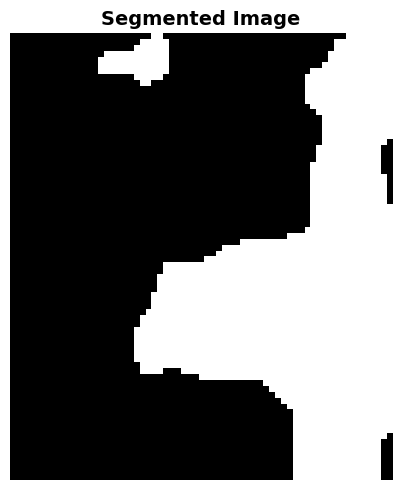

In [30]:
# show segmented image
seg_arr = sitk.GetArrayFromImage(seg)
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.imshow(seg_arr[1, :, :], cmap='gray')
ax.set_title('Segmented Image', fontsize=14, fontweight='bold')
ax.axis('off')
plt.tight_layout()
plt.show()